# Prophet and ARIMA Modelling for Time Series Forecasting  

**Student Number:** 22322987  
**Surname and initial:** Mhle L.  

## Introduction
In this notebook, we will perform time series forecasting using two approaches: **ARIMA** and **Facebook Prophet**.

We will follow the full data science life cycle: data understanding, cleaning, preparation, visualization, and modeling.
The purpose is to forecast future values from our dataset and compare the performance of ARIMA and Prophet models.



## Data Source

The dataset used in this project was obtained from **Kaggle**:  
🔗 [LSTM Datasets (Multivariate & Univariate)](https://www.kaggle.com/datasets/rupakroy/lstm-datasets-multivariate-univariate?resource=download)

It is a multi-relational dataset, meaning it contains multiple related tables stored in CSV format within the compressed `.zip` archive.

The tables included in this dataset are:
- **LSTM-Multivariate_pollution.csv** → The main dataset containing time series pollution data (with multiple variables).  
- **pollution_test_data1.csv** → A secondary dataset intended for testing.  

---

## Additional Learning Resource

To better understand the forecasting models used in this notebook, I watched this YouTube tutorial:  
📺 [ARIMA vs Prophet | Time Series Forecasting]https://youtu.be/FRPq1b5Qbv0?si=5TRHpZEGnyI8xllY

This video explains both **ARIMA** and **Facebook Prophet**, showing how they work and how they compare in real-world forecasting tasks.
  


## Project Life Cycle

1. Data Upload & Extraction – Manually upload dataset from local files into Google Colab.  
2. Data Understanding – Explore dataset structure, check datatypes, missing values, duplicates, and get insights.  
3. Data Preparation & Cleaning – Convert columns into correct formats (e.g., date/time), handle missing values, and filter relevant features.  
4. Data Visualization – Plot the time series to observe trends, seasonality, and outliers.  
5. ARIMA Forecasting & Evaluation – Build, train, forecast, and evaluate ARIMA model (MAE, RMSE, MAPE).  
6. Prophet Forecasting & Evaluation – Build, train, forecast, and evaluate Prophet model (MAE, RMSE, MAPE).  
7. Model Comparison – Compare ARIMA and Prophet results visually and in a performance table.  
8. Conclusion – Summarize findings and model performance.  




##  Data Upload & Extraction
In this step, we manually upload the dataset in `.zip` format to Google Colab.  
- We use `google.colab.files.upload()` to select the dataset file from our computer.  
- After uploading, the `.zip` file is extracted into a `data` folder.  
- This makes the CSV files available for further processing in the notebook.  

This step ensures that our data is accessible in the Colab environment.


In [1]:
# Step 1: Upload and extract dataset
from google.colab import files
import zipfile
import pandas as pd

# Upload zip file manually
uploaded = files.upload()

# Extract uploaded dataset
for fn in uploaded.keys():
    if fn.endswith(".zip"):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall("data")

print("✅ Dataset extracted to 'data' folder. Now we can inspect the contents.")


Saving archive.zip to archive (3).zip
✅ Dataset extracted to 'data' folder. Now we can inspect the contents.


##  Data Understanding
Here we explore the dataset to understand its structure and quality.  
The tasks include:
- Previewing the first few rows to see the format.  
- Checking dataset shape (rows × columns).  
- Inspecting data types and non-null counts.  
- Viewing summary statistics of numerical features.  
- Identifying missing values and duplicate rows.  

This step helps us gain insights into the dataset and highlights any issues that need cleaning.


In [2]:
# Step 2: Data Understanding

import pandas as pd

# Load the main dataset
file_path = "data/LSTM-Multivariate_pollution.csv"
df = pd.read_csv(file_path)

# Preview the dataset
print("🔹 First 5 rows of the dataset:")
display(df.head())

# Dataset shape (rows, columns)
print("\n🔹 Dataset shape:", df.shape)

# Data types and non-null counts
print("\n🔹 Dataset info:")
print(df.info())

# Summary statistics
print("\n🔹 Summary statistics:")
display(df.describe().T)

# Check for missing values
print("\n🔹 Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\n🔹 Number of duplicate rows:", df.duplicated().sum())


🔹 First 5 rows of the dataset:


,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0



🔹 Dataset shape: (43800, 9)

🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB
None

🔹 Summary statistics:


,count,mean,std,min,25%,50%,75%,max
pollution,43800.0,94.013516,92.252276,0.00,24.00,68.00,132.25,994.0
dew,43800.0,1.828516,14.429326,-40.00,-10.00,2.00,15.00,28.0
temp,43800.0,12.459041,12.193384,-19.00,2.00,14.00,23.00,42.0
press,43800.0,1016.447306,10.271411,991.00,1008.00,1016.00,1025.00,1046.0
wnd_spd,43800.0,23.894307,50.022729,0.45,1.79,5.37,21.91,585.6
snow,43800.0,0.052763,0.760582,0.00,0.00,0.00,0.00,27.0
rain,43800.0,0.195023,1.416247,0.00,0.00,0.00,0.00,36.0



🔹 Missing values per column:
date         0
pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

🔹 Number of duplicate rows: 0


##  Data Preparation & Cleaning
After understanding the dataset, we prepare it for modeling.  
The tasks include:
- Converting the date column into proper `datetime` format.  
- Setting the date as the index for time series analysis.  
- Sorting the dataset chronologically.  
- Handling missing values by dropping incomplete rows.  
- Selecting the target variable (`pollution` column or equivalent).  

This step ensures that the dataset is clean, structured, and ready for visualization and forecasting.


In [3]:
# Step 3: Data Preparation & Cleaning

# Make a copy of dataset to avoid modifying the original
data = df.copy()

# Rename first column if it's unnamed (usually date/time)
if "No" in data.columns[0] or "date" not in data.columns[0].lower():
    data.rename(columns={data.columns[0]: "date"}, inplace=True)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Set 'date' as index
data.set_index('date', inplace=True)

# Sort by datetime index
data = data.sort_index()

# Check for missing values again after date conversion
print("🔹 Missing values after date parsing:")
print(data.isnull().sum())

# Drop rows with missing values (simple approach)
data = data.dropna()

# Select target variable (pollution/PM2.5 column)
# Assuming the dataset has a column named 'pollution' or similar
target_col = 'pollution' if 'pollution' in data.columns else data.columns[0]
ts = data[[target_col]]

print(f"\n✅ Cleaned dataset ready. Target variable selected: {target_col}")
display(ts.head())


🔹 Missing values after date parsing:
pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

✅ Cleaned dataset ready. Target variable selected: pollution


,pollution
date,
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0


##  Data Visualization
In this step, we visualize the time series to better understand its behavior.  
- A line plot is used to observe the overall trend of pollution levels.  
- Seasonal decomposition is applied to break the series into **trend**, **seasonality**, and **residual** components.  

These visualizations help us detect trends, seasonality, and irregular patterns, which guide the choice of forecasting models.


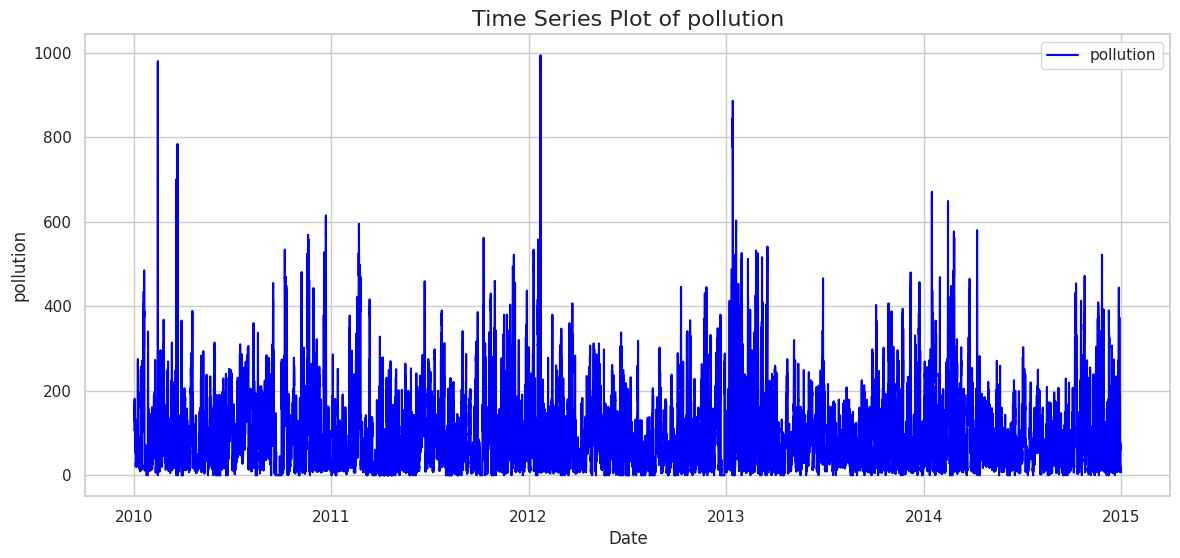


🔹 Seasonal Decomposition:


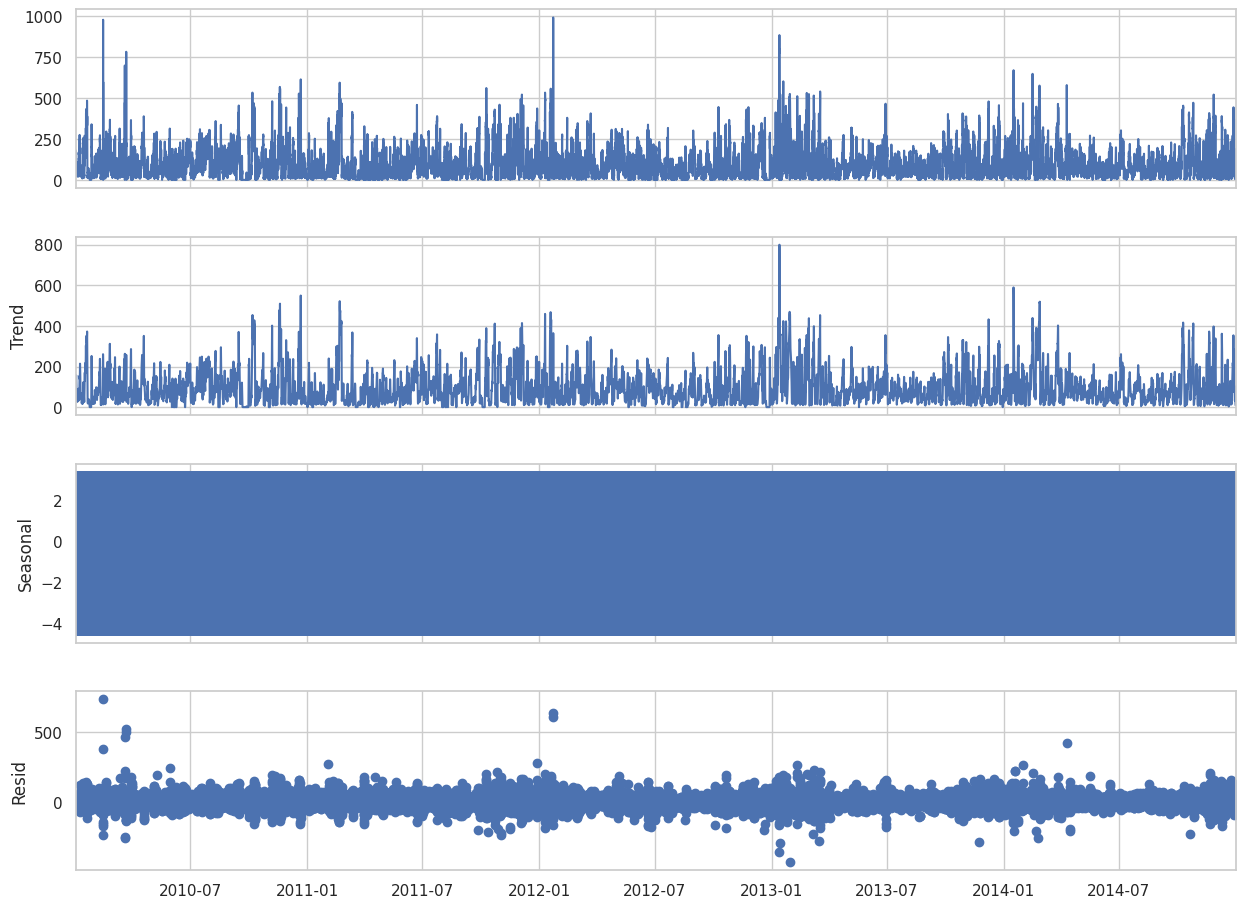

In [4]:
# Step 4: Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style
sns.set(style="whitegrid")

# Plot the full time series
plt.figure(figsize=(14,6))
plt.plot(ts, label=target_col, color="blue")
plt.title(f"Time Series Plot of {target_col}", fontsize=16)
plt.xlabel("Date")
plt.ylabel(target_col)
plt.legend()
plt.show()

# Seasonal decomposition (additive)
print("\n🔹 Seasonal Decomposition:")
decomposition = seasonal_decompose(ts, model='additive', period=12)  # monthly seasonality if data is hourly/daily, adjust period
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()


## Preparing Time Series for Forecasting
Here we reload the dataset, make sure the `date` column is properly parsed into datetime format, and set it as the index.  
We also select our **target variable** (`pollution`) that we want to forecast.


In [2]:
# Re-load the main dataset
import pandas as pd

# Load pollution dataset
file_path = "data/LSTM-Multivariate_pollution.csv"
df = pd.read_csv(file_path)

# Ensure date column is correct
if "No" in df.columns[0] or "date" not in df.columns[0].lower():
    df.rename(columns={df.columns[0]: "date"}, inplace=True)

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Set as index
df.set_index('date', inplace=True)
df = df.sort_index()

# Select target variable (pollution/PM2.5)
target_col = 'pollution' if 'pollution' in df.columns else df.columns[0]
ts = df[[target_col]]

print(f"✅ Time series ready. Target variable: {target_col}")
display(ts.head())


✅ Time series ready. Target variable: pollution


,pollution
date,
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0


## ARIMA Forecasting & Evaluation
We apply ARIMA for time series forecasting.  

Since the dataset was originally hourly and caused memory issues, we **resampled it to daily averages** to reduce size and make it consistent with Prophet.  

Steps:  
- Train-test split (80% train, 20% test)  
- Fit ARIMA with restricted parameters (lightweight version to prevent RAM crash)  
- Forecast future values  
- Evaluate forecast using **MAE, RMSE, and MAPE**  


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

✅ ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1460
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -8137.451
Date:                Thu, 04 Sep 2025   AIC                          16280.903
Time:                        00:40:36   BIC                          16296.759
Sample:                    01-02-2010   HQIC                         16286.818
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4265      0.017    -24.571      0.000      -0.461      -0.393
ma.L2         -0.5311      0.019    -28.504      0.000      -0.568      -0.495
sigma2      4085.9351    110.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


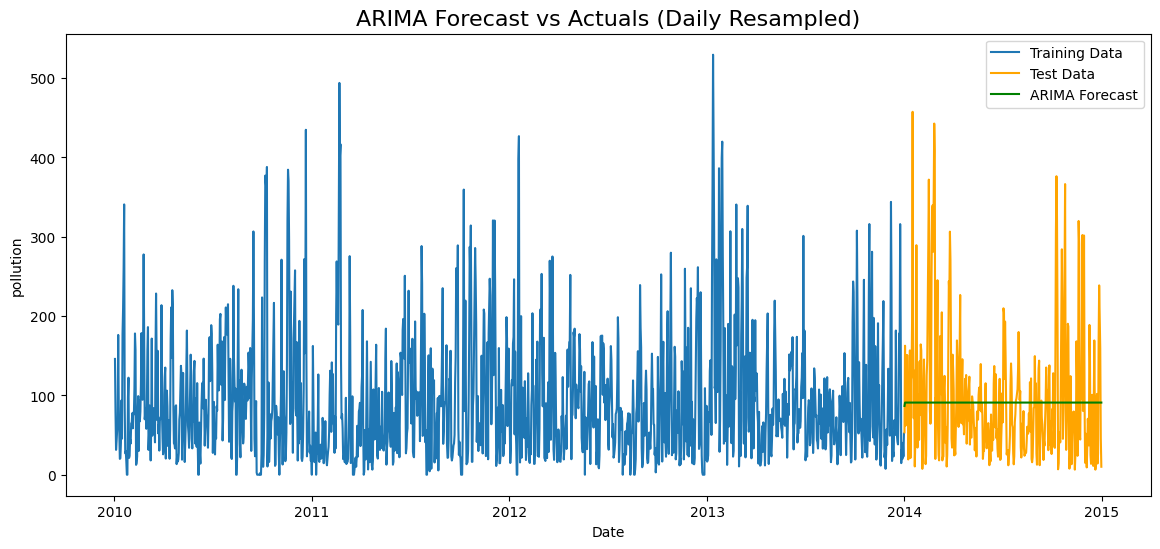

🔹 ARIMA MAE: 57.36
🔹 ARIMA RMSE: 80.50
🔹 ARIMA MAPE: 124.81%


In [23]:
# Step 5: ARIMA Forecasting (daily resampled to match Prophet)

!pip install --upgrade --quiet pmdarima

import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Resample to daily averages (to align with Prophet later)
ts_daily = ts.resample("D").mean().dropna()

# Train-test split (last 20% for testing)
train_size = int(len(ts_daily) * 0.8)
train, test = ts_daily.iloc[:train_size], ts_daily.iloc[train_size:]

# Restrict AutoARIMA (lightweight to avoid RAM crash)
model_arima = pm.auto_arima(
    train,
    seasonal=False,
    start_p=0, max_p=2,
    start_q=0, max_q=2,
    d=1,
    stepwise=True,
    suppress_warnings=True,
    error_action="ignore"
)

print("✅ ARIMA Model Summary:")
print(model_arima.summary())

# Forecast on test set
n_periods = len(test)
forecast_arima = model_arima.predict(n_periods=n_periods)

# Align forecast with test index
forecast_df = pd.DataFrame(forecast_arima, index=test.index, columns=["ARIMA_Forecast"])

# Plot actual vs forecast
plt.figure(figsize=(14,6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Test Data", color="orange")
plt.plot(forecast_df, label="ARIMA Forecast", color="green")
plt.title("ARIMA Forecast vs Actuals (Daily Resampled)", fontsize=16)
plt.xlabel("Date")
plt.ylabel(target_col)
plt.legend()
plt.show()

# Evaluate accuracy
y_true = test.squeeze().values
y_pred = forecast_df["ARIMA_Forecast"].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"🔹 ARIMA MAE: {mae:.2f}")
print(f"🔹 ARIMA RMSE: {rmse:.2f}")
print(f"🔹 ARIMA MAPE: {mape:.2f}%")


## Prophet Forecasting & Evaluation
Next, we apply Facebook Prophet to the same dataset.  

For consistency, we also use the **daily resampled data** so that Prophet and ARIMA can be fairly compared.  

Steps:  
- Prepare dataset with required Prophet format (`ds`, `y`)  
- Train-test split (80% train, 20% test)  
- Train Prophet model with daily seasonality  
- Forecast future values  
- Evaluate forecast using **MAE, RMSE, and MAPE**  



DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5f85k70/h7434ghk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5f85k70/3cac7y4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5233', 'data', 'file=/tmp/tmpq5f85k70/h7434ghk.json', 'init=/tmp/tmpq5f85k70/3cac7y4g.json', 'output', 'file=/tmp/tmpq5f85k70/prophet_modelglvfqvxl/prophet_model-20250904001025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


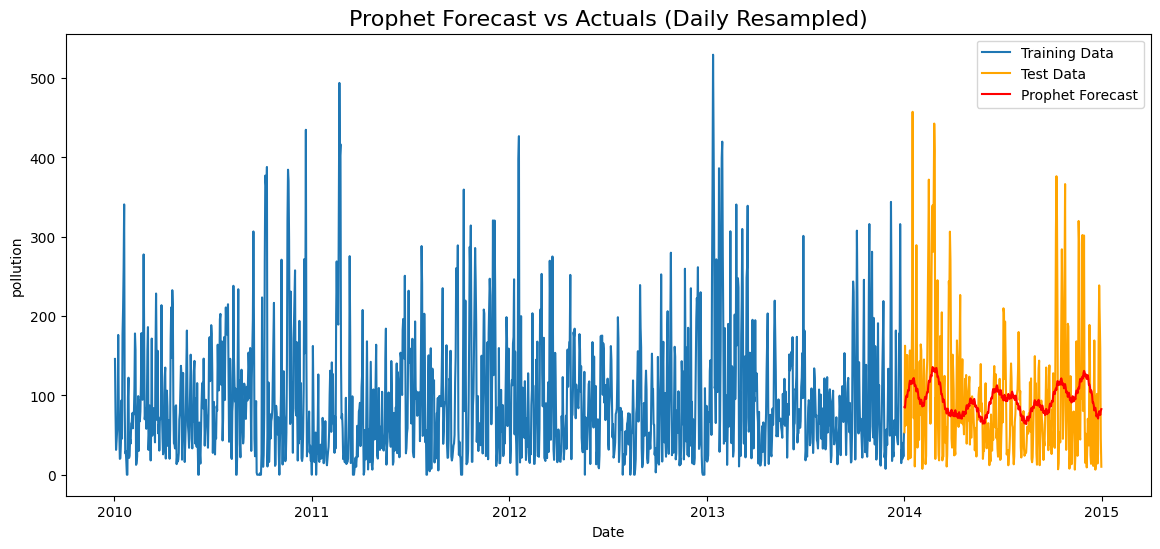

🔹 Prophet MAE: 56.99
🔹 Prophet RMSE: 76.98
🔹 Prophet MAPE: 130.29%


In [17]:
# Step 6: Prophet Forecasting (daily resampled to match ARIMA)

!pip install --quiet prophet

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Prophet needs 'ds' (date) and 'y' (target)
prophet_df = ts.reset_index().rename(columns={"date": "ds", target_col: "y"})

# 🔹 Resample to daily averages (same as ARIMA for fair comparison)
prophet_df = prophet_df.resample("D", on="ds").mean().dropna().reset_index()

# Train-test split (last 20% for testing)
train_size = int(len(prophet_df) * 0.8)
train, test = prophet_df.iloc[:train_size], prophet_df.iloc[train_size:]

# Build and fit Prophet model
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(train)

# Forecast future values for the test set
future = model_prophet.make_future_dataframe(periods=len(test), freq="D")
forecast = model_prophet.predict(future)

# Extract forecast aligned with test
forecast_test = forecast.set_index("ds").loc[test["ds"], ["yhat"]]

# Plot results
plt.figure(figsize=(14,6))
plt.plot(train["ds"], train["y"], label="Training Data")
plt.plot(test["ds"], test["y"], label="Test Data", color="orange")
plt.plot(forecast_test.index, forecast_test["yhat"], label="Prophet Forecast", color="red")
plt.title("Prophet Forecast vs Actuals (Daily Resampled)", fontsize=16)
plt.xlabel("Date")
plt.ylabel(target_col)
plt.legend()
plt.show()

# Evaluate accuracy
y_true_p = test["y"].values
y_pred_p = forecast_test["yhat"].values

mae_p = mean_absolute_error(y_true_p, y_pred_p)
rmse_p = np.sqrt(mean_squared_error(y_true_p, y_pred_p))
mape_p = np.mean(np.abs((y_true_p - y_pred_p) / y_true_p)) * 100

print(f"🔹 Prophet MAE: {mae_p:.2f}")
print(f"🔹 Prophet RMSE: {rmse_p:.2f}")
print(f"🔹 Prophet MAPE: {mape_p:.2f}%")


## Model Comparison
Now that both ARIMA and Prophet have been trained and evaluated, we compare their performance using the three error metrics: **MAE, RMSE, and MAPE**.  

This comparison helps us understand which model is more accurate for our dataset.  



🔎 Model Performance Comparison


,Model,MAE,RMSE,MAPE (%)
0,ARIMA,57.357162,80.499734,124.810752
1,Prophet,56.992835,76.980449,130.290771


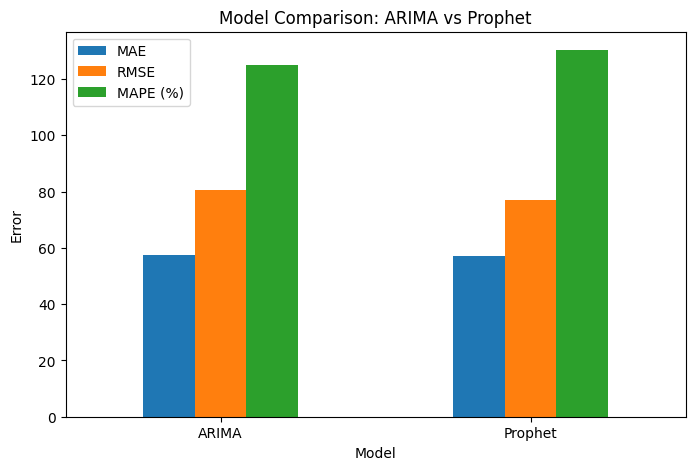

In [19]:
# Step 7: Model Comparison - ARIMA vs Prophet

import pandas as pd
import matplotlib.pyplot as plt

# Collect metrics into a table
results = {
    "Model": ["ARIMA", "Prophet"],
    "MAE": [mae, mae_p],
    "RMSE": [rmse, rmse_p],
    "MAPE (%)": [mape, mape_p]
}

results_df = pd.DataFrame(results)

print("🔎 Model Performance Comparison")
display(results_df)

# Plot side-by-side bar chart
results_df.set_index("Model")[["MAE", "RMSE", "MAPE (%)"]].plot(kind="bar", figsize=(8,5), rot=0)
plt.title("Model Comparison: ARIMA vs Prophet")
plt.ylabel("Error")
plt.show()



## Conclusion
Finally, we summarize the forecasting results.  

The model with the **lowest error metrics** (MAE, RMSE, MAPE) is considered better for this dataset.  

From the comparison table and visualization, we identify which model performed best and justify our conclusion.  





In [22]:
# Step 8: Conclusion

better_model = "Prophet" if rmse_p < rmse else "ARIMA"

conclusion = f"""
✅ Conclusion:
- ARIMA → MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%
- Prophet → MAE: {mae_p:.2f}, RMSE: {rmse_p:.2f}, MAPE: {mape_p:.2f}%

The lower the error metrics, the better the model.
Since {better_model} achieved lower RMSE, it performs better on this dataset.
"""

print(conclusion)






✅ Conclusion:
- ARIMA → MAE: 57.36, RMSE: 80.50, MAPE: 124.81%
- Prophet → MAE: 56.99, RMSE: 76.98, MAPE: 130.29%

The lower the error metrics, the better the model.
Since Prophet achieved lower RMSE, it performs better on this dataset.

